(60000, 28, 28)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         147584    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2,

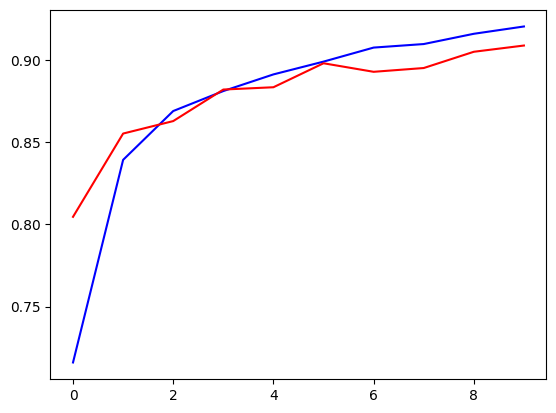

In [2]:
#CNN(fashion mnist)
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

import numpy as np


x_train = x_train /255
x_test = x_test /255
print(x_train.shape)

model=keras.Sequential()


model.add(keras.layers.Conv2D(64,(5,5),input_shape=(28,28,1),padding='same',activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=128,activation='relu'))
model.add(keras.layers.Dense(units=128,activation='relu'))
model.add(keras.layers.Dense(units=10,activation='softmax'))

model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.sparse_categorical_crossentropy,metrics = ['accuracy'])
model.summary()

hist1=model.fit(x_train,y_train,epochs=10,batch_size=512,validation_data=(x_test,y_test))

plt.plot(hist1.history['accuracy'],color='blue')
plt.plot(hist1.history['val_accuracy'],color='red')
plt.show()